In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [29]:
cap = cv2.VideoCapture(0)
X1 = []
i = 0
cap.set(3,120)
cap.set(4,160)
while(i<500):
    # Capture frame-by-frame
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    X1.append(gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    i = i + 1
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
X1 = np.array(X1).astype(np.float32)
Y1 = np.ones((X1.shape[0],1))


In [30]:
cap = cv2.VideoCapture(0)
X0 = []
i = 0
cap.set(3,120)
cap.set(4,160)
while(i<500):
    # Capture frame-by-frame
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    X0.append(gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    i = i + 1
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
X0 = np.array(X0).astype(np.float32)
Y0 = np.zeros((X0.shape[0],1))

In [31]:
X = 0
Y = 0
X = np.concatenate((X0,X1),axis = 0)
Y = np.concatenate((Y0,Y1),axis = 0)
permutation = list(np.random.permutation(X.shape[0]))
X = X[permutation,:,:]
Y = Y[permutation,:]
train_x = X[:800,:,:]
train_y = Y[:800,:]
val_x = X[800:900,:,:]
val_y = Y[800:900,:]
test_x = X[900:,:,:]
test_y = Y[900:,:]

In [32]:
train_x = train_x/255.0
test_x = test_x/255.0


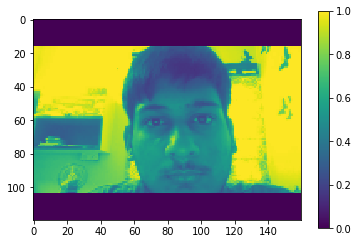

In [33]:
plt.figure()
plt.imshow(train_x[20])
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(120,160))
])
model.add(    keras.layers.Dense(200, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.2))
model.add(    keras.layers.Dense(200, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.2))
model.add(    keras.layers.Dense(1000, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.2))
model.add(    keras.layers.Dense(1000, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.2))
model.add(    keras.layers.Dense(200, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.2))
model.add(    keras.layers.Dense(1,activation='sigmoid'))


In [35]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [36]:
model.fit(train_x, train_y, epochs=10,batch_size =32,shuffle = True,validation_data = (val_x,val_y))

Train on 800 samples, validate on 100 samples
Epoch 1/10
800/800 [==============================] - 1s 2ms/sample - loss: 0.2699 - accuracy: 0.8712 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
800/800 [==============================] - 0s 223us/sample - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
800/800 [==============================] - 0s 214us/sample - loss: 0.0180 - accuracy: 0.9950 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
800/800 [==============================] - 0s 216us/sample - loss: 4.6497e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
800/800 [==============================] - 0s 204us/sample - loss: 1.2774e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
800/800 [==============================] - 0s 228us/sample - loss: 2.4467e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
800/800 [========================

In [37]:

predictions = model.predict(test_x)

n = 0
for i in range(0,100):
    if(predictions[i]>0.5):
        predictions[i] = 1
    else:
        predictions[i] = 0
    if(predictions[i] == test_y[i]):
        n  = n+1
print(n)

100


In [44]:
cap = cv2.VideoCapture(0)
X = []
i = 0
cap.set(3,120)
cap.set(4,160)
while(i<25):
    # Capture frame-by-frame
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    X.append(gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    i = i + 1
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
X = np.array(X)
Y = np.zeros((X.shape[0],1))

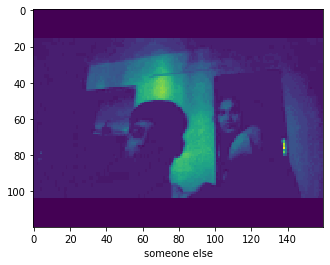

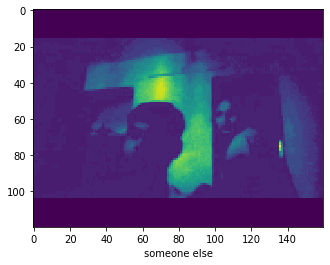

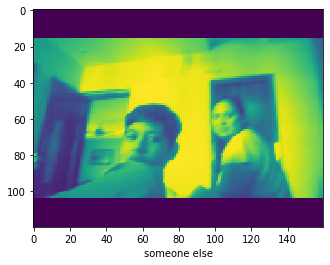

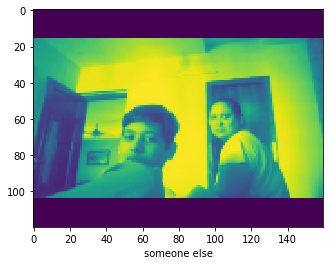

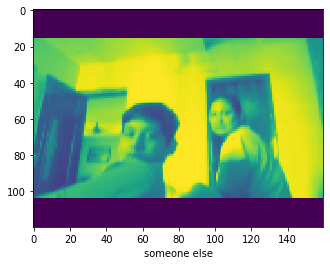

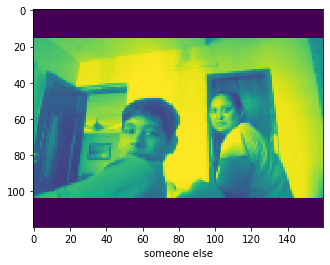

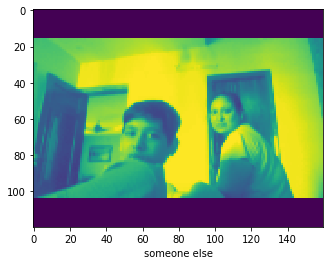

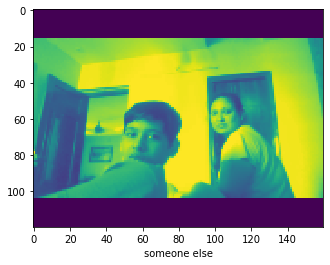

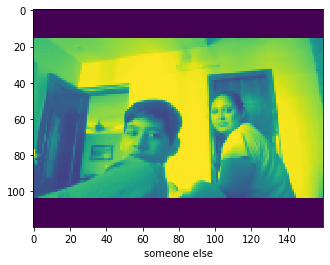

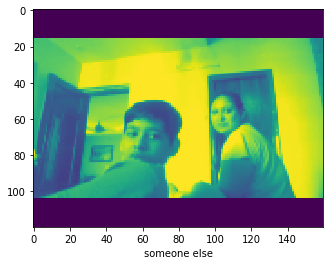

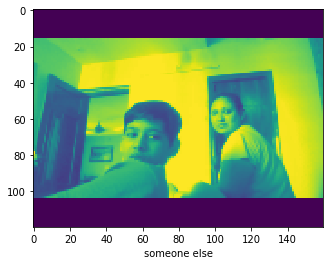

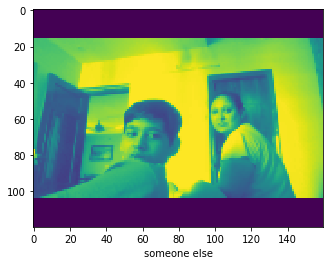

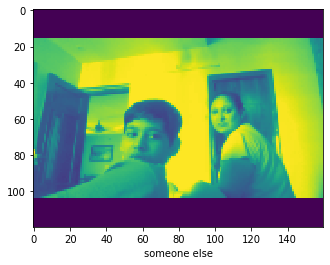

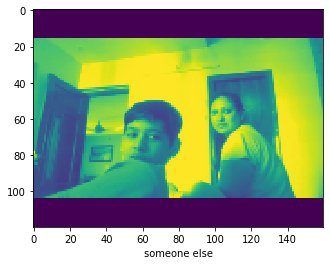

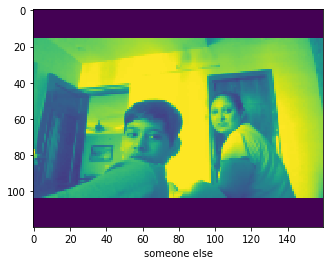

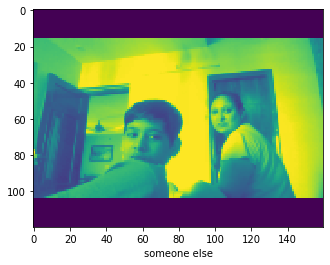

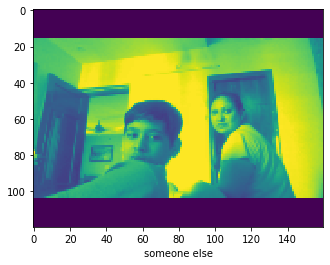

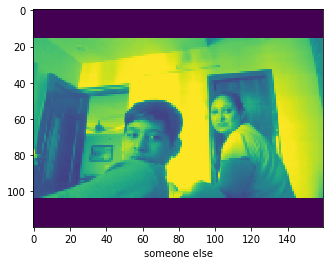

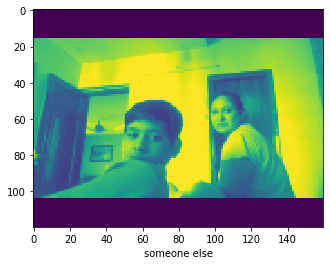

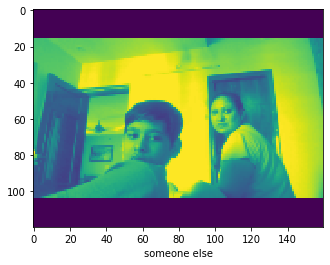

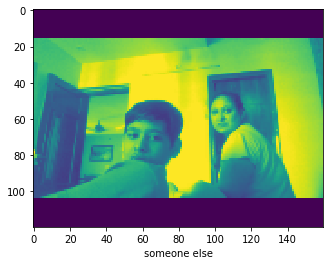

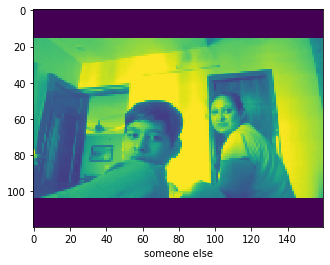

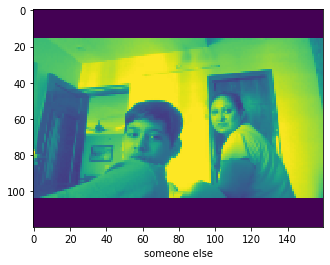

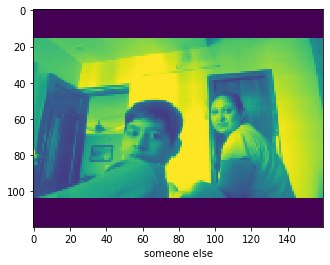

In [45]:
predictions = model.predict(X)

n = 0
for i in range(0,24):
    if(predictions[i]>0.5):
        predictions[i] = 1
        plt.imshow(X[i,:,:], interpolation='nearest')
        plt.xlabel("Pranshul")
        plt.show()
    else:
        predictions[i] = 0
        plt.imshow(X[i,:,:], interpolation='nearest')
        plt.xlabel("someone else")
        plt.show()
    if(predictions[i] == Y[i]):
        n  = n+1
